In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [14]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [15]:
X

array([[ 5.4044228 ,  7.29549236],
       [-0.04546427,  5.43763195],
       [-4.67738863, -1.79238892],
       ...,
       [-5.21892947, -1.12538599],
       [ 1.03708739,  6.13960919],
       [ 5.02842254,  8.03933143]])

In [16]:
y

array([0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 2,
       0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2,
       1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1,
       2, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2,
       2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1,
       0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 0,
       0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,

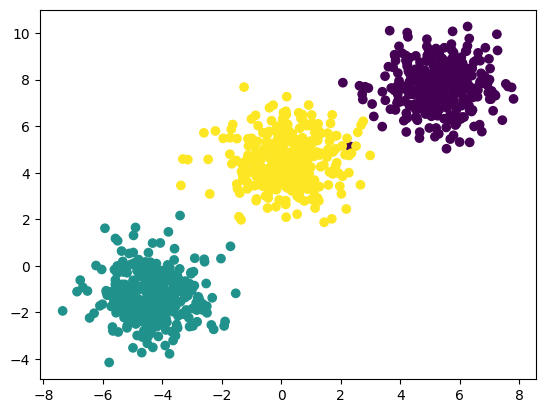

In [17]:
plt.scatter(X[:,0],X[:,1],c=y)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [23]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
from sklearn.cluster import KMeans

In [28]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [29]:
wcss

[1339.9999999999993,
 313.35772185961764,
 80.79951778908163,
 71.44701515292027,
 63.107547102103936,
 52.91774972920752,
 49.14649190783367,
 41.50427605367419,
 37.02615162791615,
 37.426855417780516]

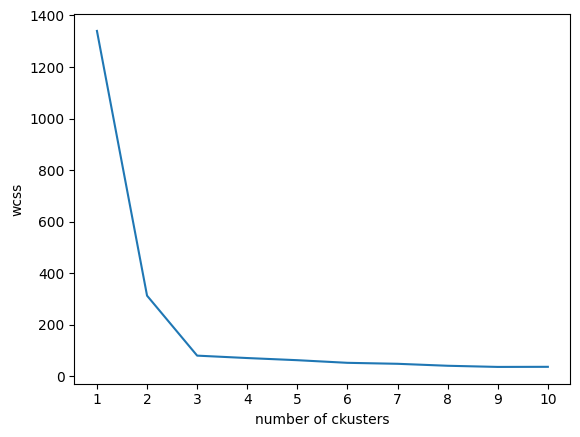

In [30]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('number of ckusters')
plt.ylabel('wcss')
plt.show()

In [32]:
Kmeans=KMeans(n_clusters=3,init='k-means++')
Kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

In [33]:
y_pred=Kmeans.predict(X_test_scaled)

In [34]:
y_pred

array([0, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0,
       2, 0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1,
       1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2,
       0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1,

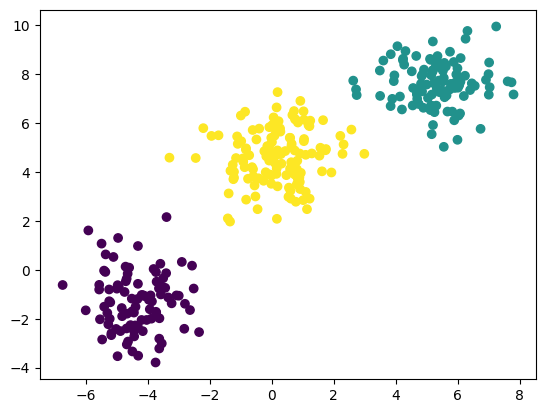

In [35]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [36]:
 !pip install kneed


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from kneed import KneeLocator

In [38]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [40]:
kl.elbow

3

In [43]:
from sklearn.metrics import silhouette_score


In [44]:
silhouette_coefficient=[]
for k in range(2,11):
    Kmeans=KMeans(n_clusters=k,init='k-means++')
    Kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,Kmeans.labels_)
    silhouette_coefficient.append(score)

In [47]:
silhouette_coefficient

[0.6724856878847111,
 0.719195197423431,
 0.5812560989489715,
 0.461809902994837,
 0.47839271490704877,
 0.42622049302478066,
 0.32431173058307566,
 0.34233090637917407,
 0.3286695061465879]

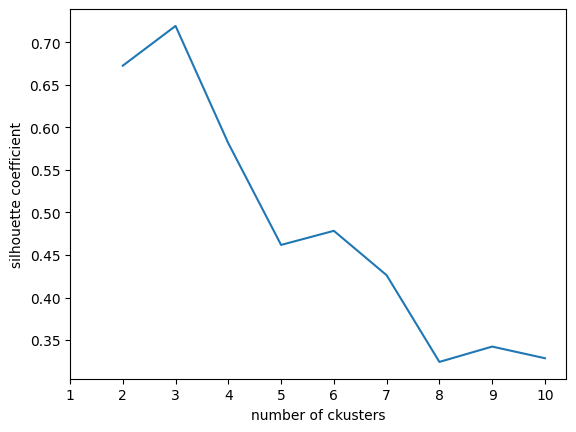

In [48]:
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(1,11))
plt.xlabel('number of ckusters')
plt.ylabel('silhouette coefficient')
plt.show()